# Tree of organisms used in this study

Downloads the GTDB tree, removes tips for organisms not investigated, and plots the tree for organisms included in this study

In [1]:
setwd("..")

In [3]:
library(readr)
library(dplyr)
library(purrr)
library(tidyr)
library(tibble)
library(stringr)
library(janitor)
library(ggplot2)
library(ggtree)
library(ggpubr)

## Read in metadata

In [4]:
# genome metadata
# filter to orpheum sim metadata (otherwise more species are represented)
orph_sim_gtdb_info <- read_tsv("../2021-orpheum-sim/inputs/gtdb_metadata.tsv", show_col_types = F) %>%
  select(species_no_space)
metadata <- read_tsv("inputs/metadata.tsv", show_col_types = F) %>%
  filter(species_no_space %in% orph_sim_gtdb_info$species_no_space)

In [5]:
# genbank assembly summary
destfile <- "inputs/assembly_summary_genbank.txt"
url <- "https://ftp.ncbi.nlm.nih.gov/genomes/genbank/assembly_summary_genbank.txt"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}

genbank <- read_tsv(destfile, skip = 1, show_col_types = F) %>%
  select(assembly_accession = `# assembly_accession`, excluded_from_refseq)

genbank <- genbank %>%
  mutate(assembly_accession_minus_version = gsub("\\.[1-9].*", "", assembly_accession)) %>%
  mutate(assembly_accession_minus_prefix = gsub("GC[AF]_", "", assembly_accession_minus_version))

In [6]:
# pangenome accessions
pangenome_genome_accessions <- Sys.glob("outputs/sourmash_sketch_tables/protein-k10_scaled100/*_long.csv") %>%
  set_names() %>%
  map_dfr(read_csv, show_col_types = F, .id = "species") %>%
  select(species, acc) %>%
  distinct() %>%
  #mutate(species = gsub("outputs\\/sourmash_sketch_tables\\/protein-k10_scaled100\\/", "", species)) %>%
  mutate(species = gsub("_long\\.csv", "", basename(species))) %>%
  filter(species %in% metadata$species_no_space)

pangenome_genome_accessions <- pangenome_genome_accessions %>%
  mutate(assembly_accession_minus_version = gsub("\\.[1-9].*", "", acc)) %>%
  mutate(assembly_accession_minus_prefix = gsub("GC[FA]_", "", assembly_accession_minus_version)) %>%
  left_join(genbank, by = "assembly_accession_minus_prefix")

## Plot GTDB tree displaying only tips of genomes investigated in panmers

### Bacteria

In [7]:
# download gtdb tree bacteria
destfile <- "inputs/gtdb_trees/bac120_r202.tree"
url <- "https://data.gtdb.ecogenomic.org/releases/release202/202.0/bac120_r202.tree"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}

In [8]:
# read in gtdb tree
gtdb_tree <- phytools::read.newick(destfile)

# drop tips from GTDB. This tree contains all GTDB species.
drop_tips <- gtdb_tree$tip.label[!str_detect(gtdb_tree$tip.label, paste(pangenome_genome_accessions$assembly_accession_minus_prefix, collapse="|"))]
gtdb_tree <- ape::drop.tip(gtdb_tree, drop_tips)

# edit tip labels to remove GC/RS
gtdb_tree$tip.label <- gsub("RS_", "", gtdb_tree$tip.label) 
gtdb_tree$tip.label <- gsub("GB_", "", gtdb_tree$tip.label) 

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

In [9]:
# download and read in lineage information
destfile <- "inputs/gtdb-rs202.taxonomy.v2.csv"
url <- "https://osf.io/p6z3w/download"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}

# change tree labels to species
gtdb_lineages <- read_csv(destfile, show_col_types = F)
gtdb_lineages <- gtdb_lineages %>%
  filter(ident %in% gtdb_tree$tip.label)

# order lineages by tip labels
gtdb_lineages <- gtdb_lineages[match(gtdb_tree$tip.label, gtdb_lineages$ident), ]
gtdb_lineages <- gtdb_lineages %>%
  left_join(metadata) 

Joining, by = c("superkingdom", "phylum", "class", "order", "family", "genus", "species")


In [10]:
# create tree
p_bac <- ggtree(gtdb_tree, branch.length = "none") + 
  geom_tiplab(size = 2) + 
  coord_cartesian(clip = 'off') +
  theme_tree2(plot.margin=margin(6, 120, 6, 6))

# edit tip labels to species names
p_bac$data$label <- ifelse(p_bac$data$label %in% gtdb_lineages$ident, gtdb_lineages$species, p_bac$data$label)

# make tip labels line up with first column
gtdb_lineages <- gtdb_lineages %>%
  select(species, ident, phylum, n)

# change plot margins to display facet and species names on tip labels
p_bac <- facet_plot(p_bac, panel = "Species in pangenome", 
             data = gtdb_lineages, geom = ggstance::geom_barh, 
             aes(x = as.numeric(n)), 
             stat = "identity", width = .6)
            
p_bac <- p_bac + xlim_tree(25) + xlim_expand(c(-5, 5), 'Species in pangenome') 
p_bac <- facet_labeller(p_bac, c(Tree = "Bacteria", bar = "species in pangenome"))
# d = data.frame(.panel = c('Species in pangenome', 'Species in pangenome'), 
#                 lab = c("distance", "number of species"), 
#                 x=c(2.5, 0), y=-2)
# 
# p2 + scale_y_continuous(limits=c(0, 31), 
#                         expand=c(0,0), 
#                         oob=function(x, ...) x) +
#     geom_text(aes(label=lab), data=d) + 
#     coord_cartesian(clip='off')  + 
#     theme(plot.margin=margin(6, 6, 40, 6))

### Archaea

In [11]:
# download archaea tree
destfile <- "inputs/gtdb_trees/ar122_r202.tree"
url <- "https://data.gtdb.ecogenomic.org/releases/release202/202.0/ar122_r202.tree"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}

In [12]:
# read in tree
gtdb_tree <- phytools::read.newick(destfile)

# drop tips from GTDB. This tree contains all GTDB species.
drop_tips <- gtdb_tree$tip.label[!str_detect(gtdb_tree$tip.label, paste(pangenome_genome_accessions$assembly_accession_minus_prefix, collapse="|"))]
gtdb_tree <- ape::drop.tip(gtdb_tree, drop_tips)

# edit tip labels to remove GC/RS
gtdb_tree$tip.label <- gsub("RS_", "", gtdb_tree$tip.label) 
gtdb_tree$tip.label <- gsub("GB_", "", gtdb_tree$tip.label) 

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by coercion”
Warning message in getEdgeLength(text, i):
“NAs introduced by co

In [13]:
# change tree labels to species
gtdb_lineages <- read_csv("inputs/gtdb-rs202.taxonomy.v2.csv", show_col_types = F)
gtdb_lineages <- gtdb_lineages %>%
  filter(ident %in% gtdb_tree$tip.label)

# order lineages by tip labels
gtdb_lineages <- gtdb_lineages[match(gtdb_tree$tip.label, gtdb_lineages$ident), ]
gtdb_lineages <- gtdb_lineages %>%
  left_join(metadata) 

Joining, by = c("superkingdom", "phylum", "class", "order", "family", "genus", "species")


In [14]:
# create tree
p_arch <- ggtree(gtdb_tree, branch.length = "none") + 
  geom_tiplab(size = 2) + 
  coord_cartesian(clip = 'off') +
  theme_tree2(plot.margin=margin(6, 120, 6, 6))

# edit tip labels to species names
p_arch$data$label <- ifelse(p_arch$data$label %in% gtdb_lineages$ident, gtdb_lineages$species, p_arch$data$label)

# make tip labels line up with first column
gtdb_lineages <- gtdb_lineages %>%
  select(species, ident, phylum, n)

# change plot margins to display facet and species names on tip labels
p_arch <- facet_plot(p_arch, panel = "Species in pangenome", 
             data = gtdb_lineages, geom = ggstance::geom_barh, 
             aes(x = as.numeric(n)), 
             stat = "identity", width = .6)
            
p_arch <- p_arch + xlim_tree(25) + xlim_expand(c(-5, 5), 'Species in pangenome') 
p_arch <- facet_labeller(p_arch, c(Tree = "Archaea", bar = "species in pangenome"))

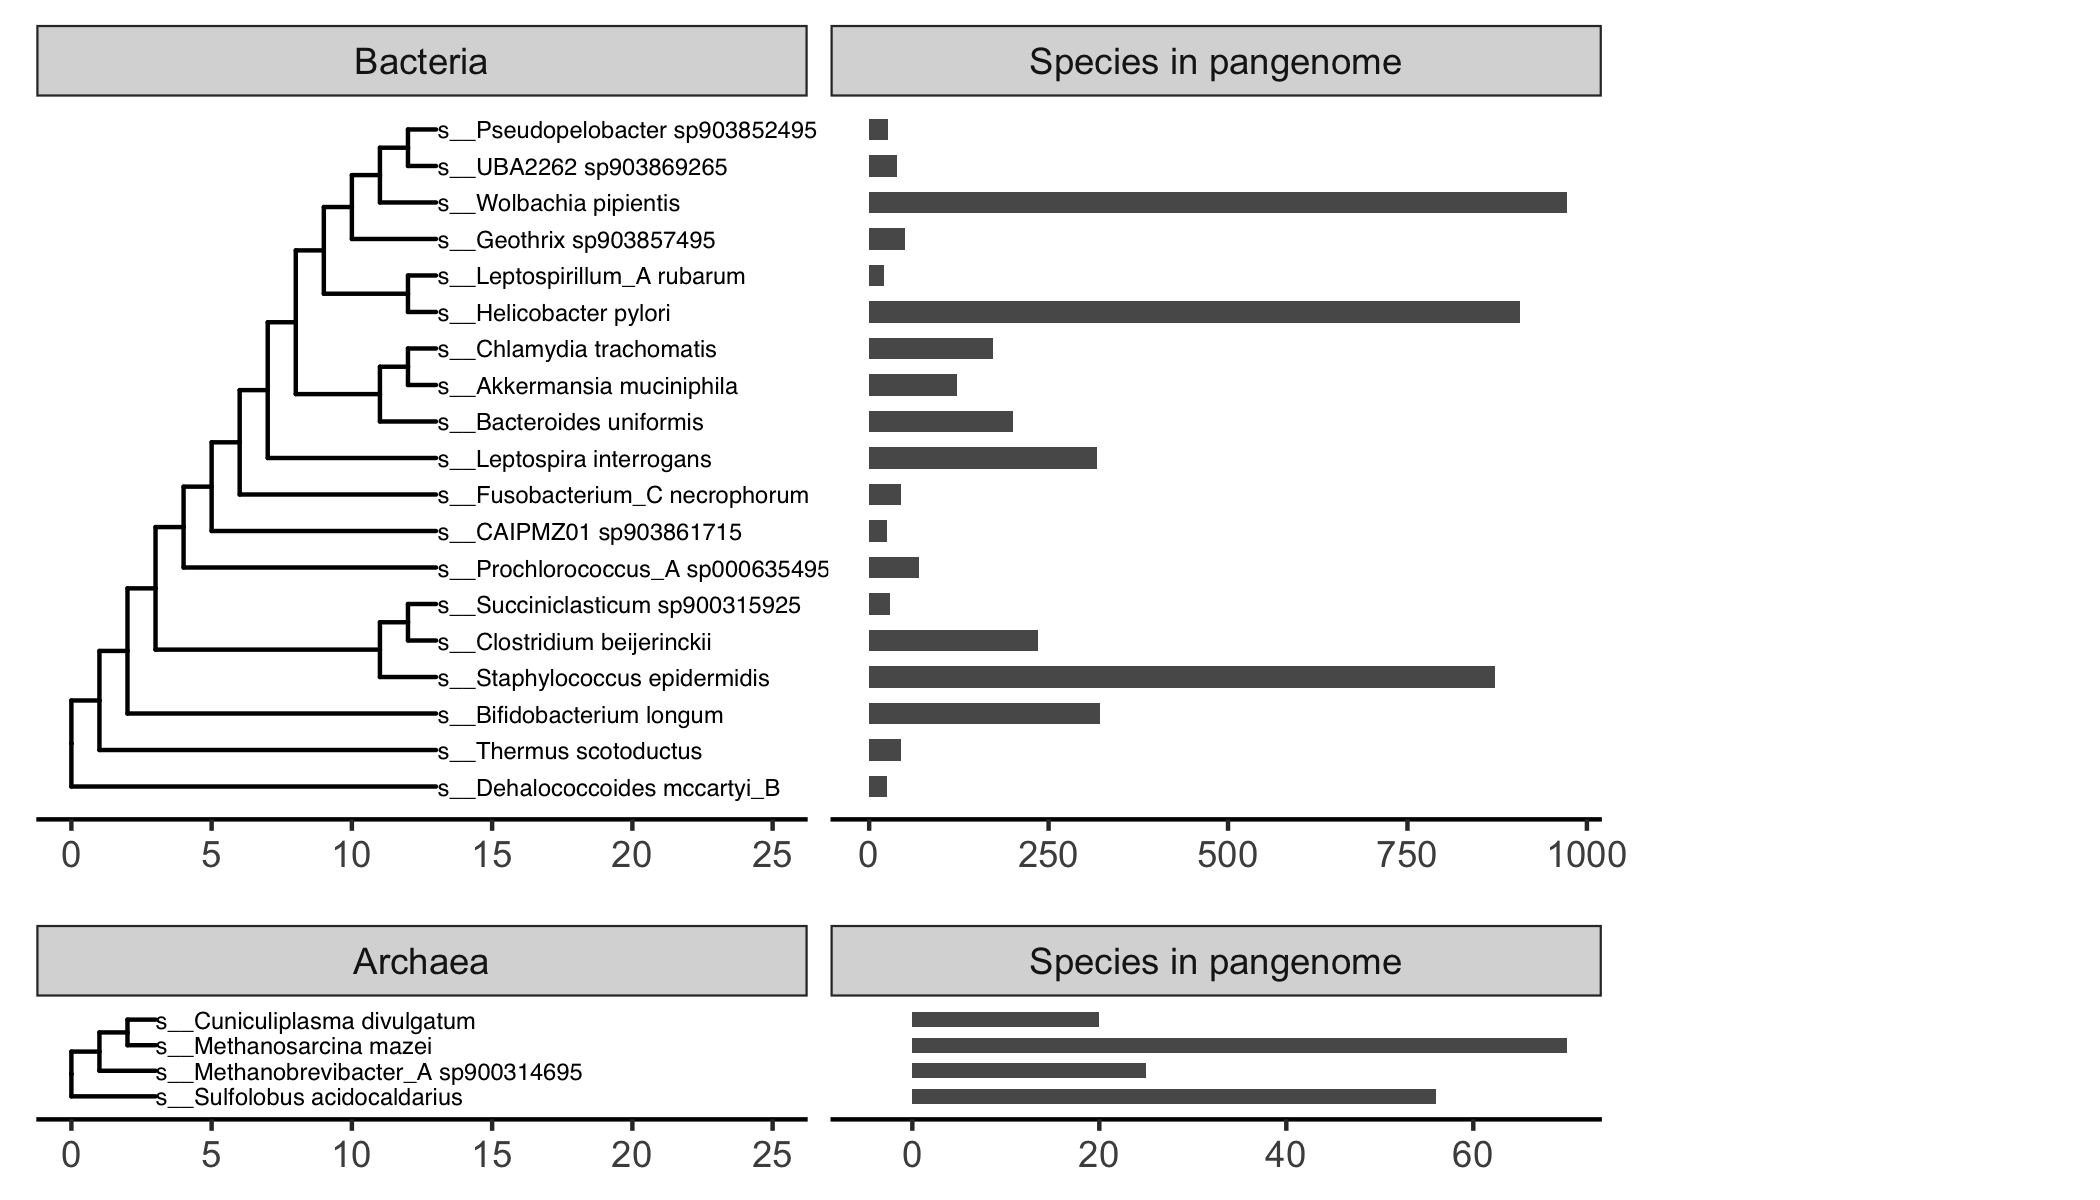

In [15]:
# adjust plot size rendered inline
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 300)


# combine trees
ggarrange(p_bac, p_arch, ncol = 1, nrow = 2, heights = c(3, 1))